# Regression Discontinuity Design Project

Team 3:

-Diego Abel Cuevas

-Wayne Vong

-Sadik Quansah
    

## Assumptions and data set

The following project estimates the effect that two lockdowns and the intermediate reopening of schools, which happened in 2020, in Quebec, had on the number of Covid cases. To do so, we assumed that the effect was big enough to justify the use of RDD (regression discontinuity design). 

The data set for the number of Covid cases was found on the Partenariat Données Québec website:
https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-cas-confirmes/resource/d2cf4211-5400-46a3-9186-a81e6cd41de9

The following models were made with the assumption that the data of our target variable, Covid cases, resembles the normal distribution.

We settled for a time period where the post cut-off period is a week longer than the pre cut-off period by a week 
because, as it is common knowledge, Covid can take up to 2 weeks to demonstrate symptoms. We thought that only 2 weeks 
should be enough to paint a picture of the situation prior to our cut-off dates, but that more would be required for the 
timeframe following the cut-off dates since its effect might be delayed by up to 2 weeks.

We used a 2 degree polynomial because an early plot of the data showed us that the progression of Covid cases per day over time was not linear, which we only used on the feature day_difference. We could however not use polynomials on the boolean columns that verify if the dates are before or after the cut-offs since boolean values are either 0 or 1, and remain therefore unchanged after applying polynomials.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('COVID19_Qc_RapportINSPQ_HistoVigie.csv')
df = df.drop(0)
df = df[['Date', 'Nb_Nvx_Cas']]
df['Date'] = pd.to_datetime(df['Date'])

df.head()


,Date,Nb_Nvx_Cas
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
5,2020-01-27,0


In [2]:
days_before = 14
days_after = 21

## Effect of the first lockdown

C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\2595372029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lockdown1['After_lockdown1'] = np.where(df_lockdown1['Date'] >= lockdown_date1, 1, 0)
C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\2595372029.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lockdown1['day_difference'] =  (df['Date'] - lockdown_date1).dt.days
C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\2595372029.py:12: SettingWithCopyWarning: 
A value is trying to b

                            WLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.882
Model:                            WLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     79.42
Date:                Mon, 08 May 2023   Prob (F-statistic):           6.50e-15
Time:                        22:46:43   Log-Likelihood:                -216.26
No. Observations:                  36   AIC:                             440.5
Df Residuals:                      32   BIC:                             446.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     99

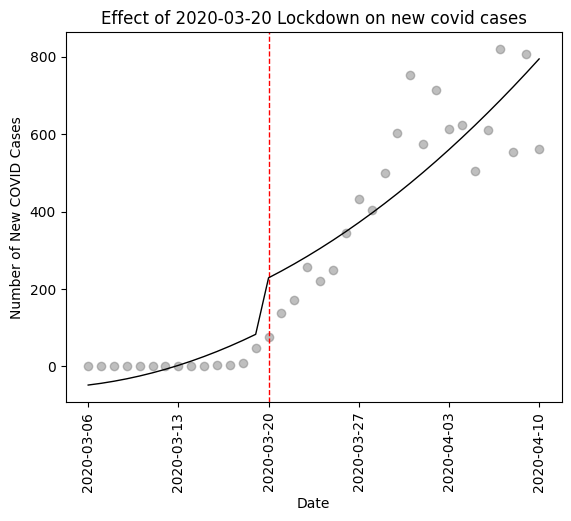

In [3]:
#FIRST LOCKDOWN
from datetime import datetime

lockdown_date1 = pd.to_datetime('2020-03-20')

df_lockdown1 = df[(df['Date'] >= lockdown_date1 - pd.Timedelta(days=days_before)) & (df['Date'] <= lockdown_date1 + pd.Timedelta(days=days_after))]

df_lockdown1['After_lockdown1'] = np.where(df_lockdown1['Date'] >= lockdown_date1, 1, 0)

df_lockdown1['day_difference'] =  (df['Date'] - lockdown_date1).dt.days

df_lockdown1['day_difference_squared'] = df_lockdown1['day_difference'] * df_lockdown1['day_difference'] 

model = sm.WLS(df_lockdown1['Nb_Nvx_Cas'], sm.add_constant(df_lockdown1[['After_lockdown1','day_difference', 'day_difference_squared']]))

results = model.fit()

print(results.summary())

fig, ax = plt.subplots()
ax.scatter(df_lockdown1['Date'], df_lockdown1['Nb_Nvx_Cas'], color='grey', alpha=0.5)
ax.axvline(x=lockdown_date1, color='red', linestyle='--', linewidth=1)
ax.plot(df_lockdown1['Date'], results.predict(), color='black', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Number of New COVID Cases')
plt.title('Effect of 2020-03-20 Lockdown on new covid cases')
ticks= ['2020-03-06','2020-03-13', '2020-03-20', '2020-03-27', '2020-04-03', '2020-04-10']
plt.xticks(ticks, rotation ='vertical')
plt.show()

For this event, After_lockdown1 has a p-value of 0.093. We use a 5% level of significance. As such we can say that the first lockdown of 2020-03-20 did not have a significant impact on new covid cases.

## Effect of reopening of schools

                            WLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.928
Model:                            WLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 08 May 2023   Prob (F-statistic):           2.57e-18
Time:                        22:46:43   Log-Likelihood:                -179.02
No. Observations:                  36   AIC:                             366.0
Df Residuals:                      32   BIC:                             372.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    132

C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\1640059604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school_reopening['After_reopening'] = np.where(df_school_reopening['Date'] >= school_reopening_date, 1, 0)
C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\1640059604.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school_reopening['day_difference'] =  (df['Date'] - school_reopening_date).dt.days
C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\1640059604.py:10: SettingWithCo

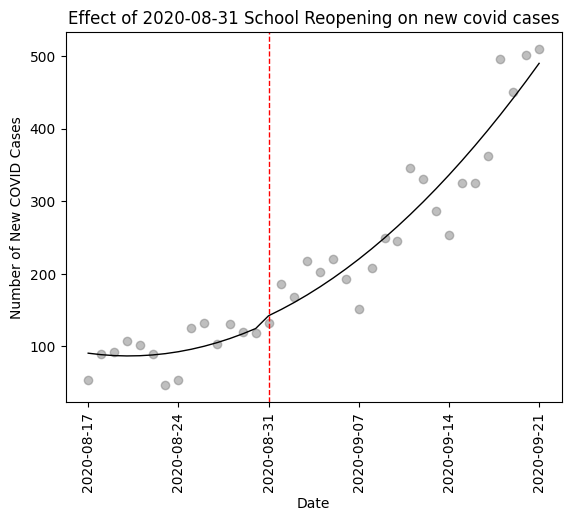

In [4]:
#SCHOOL REOPENING
school_reopening_date = pd.to_datetime('2020-08-31')

df_school_reopening = df[(df['Date'] >= school_reopening_date - pd.Timedelta(days=days_before)) & (df['Date'] <= school_reopening_date + pd.Timedelta(days=days_after))]

df_school_reopening['After_reopening'] = np.where(df_school_reopening['Date'] >= school_reopening_date, 1, 0)

df_school_reopening['day_difference'] =  (df['Date'] - school_reopening_date).dt.days

df_school_reopening['day_difference_squared'] = df_school_reopening['day_difference'] * df_school_reopening['day_difference'] 

model = sm.WLS(df_school_reopening['Nb_Nvx_Cas'], sm.add_constant(df_school_reopening[['After_reopening','day_difference', 'day_difference_squared']]))
results = model.fit()

print(results.summary())

fig, ax = plt.subplots()
ax.scatter(df_school_reopening['Date'], df_school_reopening['Nb_Nvx_Cas'], color='grey', alpha=0.5)
ax.axvline(x=school_reopening_date, color='red', linestyle='--', linewidth=1)
ax.plot(df_school_reopening['Date'], results.predict(), color='black', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Number of New COVID Cases')
ticks= ['2020-08-17','2020-08-24', '2020-08-31','2020-09-07','2020-09-14', '2020-09-21']
plt.xticks(ticks, rotation ='vertical')
plt.title('Effect of 2020-08-31 School Reopening on new covid cases')
plt.show()

In this instance, the P value for the binary column 'After_reopening' (0.721), being superior to 0.05, the standard confidence level, tells us that there is not enough evidence to disprove the null hypothesis that there is no correlation between school reopening and covid cases. In other words, this model tells us that the discontinuity on 2020-08-31 is not statistically significant to the number of covid cases.

## Effect of the second lockdown

C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\97790452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lockdown2['After_lockdown2'] = np.where(df_lockdown2['Date'] >= lockdown_date2, 1, 0)
C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\97790452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lockdown2['day_difference'] =  (df['Date'] - lockdown_date2).dt.days
C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\97790452.py:10: SettingWithCopyWarning: 
A value is trying to be set o

                            WLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.536
Model:                            WLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     12.32
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.60e-05
Time:                        22:46:43   Log-Likelihood:                -239.24
No. Observations:                  36   AIC:                             486.5
Df Residuals:                      32   BIC:                             492.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2326

([<matplotlib.axis.XTick at 0x25172c40c90>,
 [Text(18607.0, 0, '2020-12-11'),
  Text(18614.0, 0, '2020-12-18'),
  Text(18621.0, 0, '2020-12-25'),
  Text(18628.0, 0, '2021-01-01'),
  Text(18635.0, 0, '2021-01-08'),
  Text(18642.0, 0, '2021-01-15')])

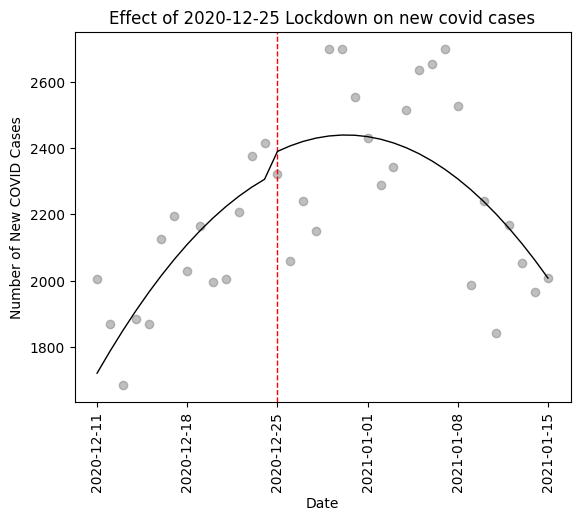

In [5]:
#SECOND LOCKDOWN
lockdown_date2 = pd.to_datetime('2020-12-25')

df_lockdown2 = df[(df['Date'] >= lockdown_date2 - pd.Timedelta(days=days_before)) & (df['Date'] <= lockdown_date2 + pd.Timedelta(days=days_after))]

df_lockdown2['After_lockdown2'] = np.where(df_lockdown2['Date'] >= lockdown_date2, 1, 0)

df_lockdown2['day_difference'] =  (df['Date'] - lockdown_date2).dt.days

df_lockdown2['day_difference_squared'] = df_lockdown2['day_difference'] * df_lockdown2['day_difference']


#cap outliers
for i in range(len(df_lockdown2)):
    if df_lockdown2.loc[i+324, 'Nb_Nvx_Cas'] >2700:
        df_lockdown2.loc[i+324, 'Nb_Nvx_Cas'] = 2700

model = sm.WLS(df_lockdown2['Nb_Nvx_Cas'], sm.add_constant(df_lockdown2[['After_lockdown2','day_difference', 'day_difference_squared']]))
results = model.fit()

print(results.summary())

fig, ax = plt.subplots()
ax.scatter(df_lockdown2['Date'], df_lockdown2['Nb_Nvx_Cas'], color='grey', alpha=0.5)
ax.axvline(x=lockdown_date2, color='red', linestyle='--', linewidth=1)
ax.plot(df_lockdown2['Date'], results.predict(), color='black', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Number of New COVID Cases')
plt.title('Effect of 2020-12-25 Lockdown on new covid cases')
ticks= ['2020-12-11','2020-12-18', '2020-12-25','2021-01-01','2021-01-08', '2021-01-15']
plt.xticks(ticks, rotation ='vertical')

After_lockdown2 has a p-value of 0.656, making it not statistically significant. If we use a 5% confidence level, we would not reject the null hypothesis and say that the 2020-03-20 lockdown did not have a significant impact on the variation of new covid cases.

                            OLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     12.32
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.60e-05
Time:                        22:46:44   Log-Likelihood:                -239.24
No. Observations:                  36   AIC:                             486.5
Df Residuals:                      32   BIC:                             492.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2326

C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\1999594136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lockdown2['After_lockdown2'] = np.where(df_lockdown2['Date'] >= lockdown_date2, 1, 0)
C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\1999594136.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lockdown2['day_difference'] =  (df['Date'] - lockdown_date2).dt.days
C:\Users\Bootcamp\AppData\Local\Temp\ipykernel_78116\1999594136.py:11: SettingWithCopyWarning: 
A value is trying to be

([<matplotlib.axis.XTick at 0x25172a51c90>,
 [Text(18607.0, 0, '2020-12-11'),
  Text(18614.0, 0, '2020-12-18'),
  Text(18621.0, 0, '2020-12-25'),
  Text(18628.0, 0, '2021-01-01'),
  Text(18635.0, 0, '2021-01-08'),
  Text(18642.0, 0, '2021-01-15')])

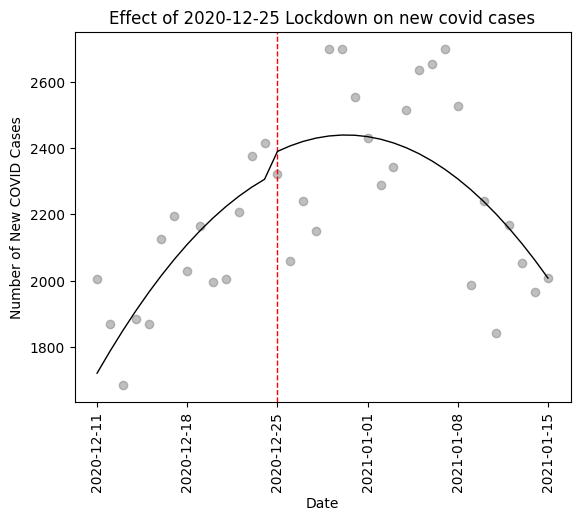

In [6]:
#SECOND LOCKDOWN OLS

lockdown_date2 = pd.to_datetime('2020-12-25')

df_lockdown2 = df[(df['Date'] >= lockdown_date2 - pd.Timedelta(days=days_before)) & (df['Date'] <= lockdown_date2 + pd.Timedelta(days=days_after))]

df_lockdown2['After_lockdown2'] = np.where(df_lockdown2['Date'] >= lockdown_date2, 1, 0)

df_lockdown2['day_difference'] =  (df['Date'] - lockdown_date2).dt.days

df_lockdown2['day_difference_squared'] = df_lockdown2['day_difference'] * df_lockdown2['day_difference']

#cap outliers
for i in range(len(df_lockdown2)):
    if df_lockdown2.loc[i+324, 'Nb_Nvx_Cas'] >2700:
        df_lockdown2.loc[i+324, 'Nb_Nvx_Cas'] = 2700

X = sm.add_constant(df_lockdown2[['After_lockdown2','day_difference', 'day_difference_squared']])
Y = df_lockdown2['Nb_Nvx_Cas']
model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

fig, ax = plt.subplots()
ax.scatter(df_lockdown2['Date'], df_lockdown2['Nb_Nvx_Cas'], color='grey', alpha=0.5)
ax.axvline(x=lockdown_date2, color='red', linestyle='--', linewidth=1)
ax.plot(df_lockdown2['Date'], results.predict(X), color='black', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Number of New COVID Cases')
plt.title('Effect of 2020-12-25 Lockdown on new covid cases')
ticks= ['2020-12-11','2020-12-18', '2020-12-25','2021-01-01','2021-01-08', '2021-01-15']
plt.xticks(ticks, rotation ='vertical')






### OlS vs WLS Regression ###
In both situation, we get a p-value of 0.0656 for After_lockdown2. We also get the same p-values for our other predictors. This means that the two outliers did not have a big impact on the regression results. R-squared also remains the same which means that both models are not a good fit for the test we are trying to run.

## Conclusion

All things considered, we found out that there might not have been a significant effect on the spread of Covid caused by 
these dates, which we can see in many ways. If one is to look at the graphs of Covid cases surrounded these dates, it 
becomes apparent that the dates don't pose a real discontinuity since there is no sudden increase nor decrease of y values 
after these dates. Furthermore, the p-values for each event were all greater than 0.05, which means that there was not 
enough evidence to conclude that these events had a statistically significant effect on the outcome variable.

In contrast, the constant value was highly significant, which suggests that other factors were likely more influential in 
determining the number of new COVID cases. Regarding regression discontinuity, the results of the model do not provide 
sufficient evidence to support its presence. Without a significant effect of the events, it is difficult to conclude 
whether or not there was a discontinuity in the trend of COVID cases at the time of the events. However, it is still 
possible that other factors not included in the model could have contributed to such a discontinuity.